# SWMAL Exercise


## Performance Metrics

There are a number of frequently uses metrics in ML, namely accuracy, precision, recall and the $F_1$ score. All are called _metrics_ (though they are not true norms, like ${\cal L}_2$ or ${\cal L}_1$ we saw last time).

Maybe performance _score_ would be a better name than performance metric, at least for the accuracy, precision, recall we will be looking at---emphasising the conceptual distinction between the  _score-function_ and _cost(/loss/error/objective)-function_ (the later is typically a true distance/norm function).  

You can find a lot of details on say precision and recall in Wikipedia

>  https://en.wikipedia.org/wiki/Precision_and_recall


### Nomenclature

| NAME | SYMBOL | ALIAS |
| :---: | :---: | :---: |
|true positives | $TP$ | |
|true negatives | $TN$ | |
|false positives| $FP$ | type I error| 
|false negatives| $FN$ | type II error |

and $N = N_P + N_N$ being the total number of samples and the number of positive and negative samples
respectively.

### Precision

$$
\def\by{\mathbf{y}}
\def\ba{\begin{array}{lll}}
\def\ea{\end{array}}
\newcommand{\rem}[1]{}
\newcommand\st[1]{_{\scriptsize #1}}
\newcommand\myfrac[2]{\frac{#1\rule{0pt}{8pt}}{#2\rule{0pt}{8pt}}} 
\ba
 p &= \myfrac{TP}{TP + FP}
\ea
$$

### Recall or Sensitivity

$$
  \ba
    r &= \myfrac{TP}{TP + FN}\\
      &= \myfrac{TP}{N_P}
  \ea
$$

### Accuracy

$$
  \ba
      a &= \myfrac{TP + TN}{TP + TN + FP + FN}\\
        &= \myfrac{TP + TN}{N}\\
        &= \myfrac{TP + TN}{N_P~~ + N_N} 
  \ea
$$

#### Accuracy Paradox

A static constant model, say $p\st{cancer}=0$ may have higher accuracy than a real model with predictive power. This is odd!

Asymmetric weights could also be associated with the false positive and false negative predictions, yielding either FP of FN much more expensive than the other. Say, it is more expensive not to treat a person with cancer, than treating a person without cancer. 

### F-score

General $\beta$-harmonic mean of the precision and recall 
$$
    F_\beta = (1+\beta^2) \myfrac{pr}{\beta^2 p+r}\\
$$ 
that for say $\beta=2$ or $\beta=0.5$ shifts or skews the emphasis on the two variables in the equation. Normally only the $\beta=1$ harmonic mean is used

$$
  \ba
    F_1 &= \myfrac{2pr}{p+r}\\
        &= \myfrac{2}{1/p + 1/r}
  \ea
$$
with $F$ typically being synonymous with $F_1$. 

If needed, find more info on Wikipedia

> https://en.wikipedia.org/wiki/F1_score


## Confusion Matrix

For statistical classification, the confusion matrix or error matrix (or
matching matrix in unsupervised learning) is for a two-class problem given by
the $2\times2$ matrix with dimensions 'actual' and 'predicted'

$$   
{\bf M}\st{confusion} = 
\begin{array}{l|ll}
                           & \mbox{actual true} & \mbox{actual false} \\ \hline
    \mbox{predicted true}  & TP & FP \\     
    \mbox{predicted false} & FN & TN 
\end{array}
$$

The diagonal, in the square matrix, represent predicted values being the same
as the actual values, off-diagonal elements represent erroneous prediction.

Also notice, that the layout of this matrix is different of what is given in [HOML], "Confusion Matrix", p.110/fig 3-3. This is just a minor issue, since we can always flip/rotate/transpose the matrix (say by flipping the $\by\st{true}$ and $\by\st{pred}$ arguments). 

For N-class classification the matrix gives a matrix with $N$ actual
classes and $N$ predicted classes

$$
{\bf M}\st{confusion}~~~ =
  \left[
  \begin{array}{llll}
       c_{11} & c_{12} & \cdots & c_{1n} \\ 
       c_{21} & c_{22} & \cdots & c_{2n} \\
       \vdots & \vdots & \ddots & \vdots \\
       c_{n1} & c_{n2} & \cdots & c_{nn} \\ 
  \end{array}
  \right]
$$
with say element $c_{21}$ being the number of actual classes '1' being predicted (erroneously) as class '2'.

### Nomenclature for the Confusion Matrix

The naming of the elements in the confusion matrix can be rather exotic, like _false omission rate_ (see the figure below), but we won't get to such detail here...let us stick with TP, TN, FP, FN and $F_1$!

<img src="https://itundervisning.ase.au.dk/SWMAL/L02/Figs/performance_metrics.jpg" alt="WARNING: could not get image from server" style="width:900px">

If you need more info on the confusion matrix:

>  https://en.wikipedia.org/wiki/Confusion_matrix

#### Qa Implement the Accuracy function and test it on the MNIST data.

We now follow the convention in Scikit-learn, that a score funtion takes the arguments `y_true` and then `y_pred`

```
    sklearn.metrics.accuracy_score(y_true, y_pred, ..)
```

Implement a general accuracy function `MyAccuracy(y_true, y_pred)`. Again, implement the function you self from scratch, i.e. do not use any helper functions from Scikit-learn (implementing via `sklearn.metrics.confusion_matrix` is also not allowed, othewise you will then learn nothing!)

Reuse your MNIST data loader and test the `MyAccuracy` function  both on your dummy classifier and on the Stochastic Gradient Descent classifier (with setup parameters as in [HOML]).

Compare your accuracy score with the acutal value from `sklearn.metrics.accuracy_score()`.

(Implementation note: what do you do, if the denominator is zero?)

In [15]:
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score
from sklearn.linear_model import SGDClassifier

# To suppress the parser warning parser has been used
X, y = fetch_openml('mnist_784', return_X_y=True, parser='liac-arff')

# train_test_split has been used to split dataset to training and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# create a simple dummy classifier baseline
dummy_classifier = DummyClassifier(strategy="most_frequent")

# Train data
dummy_classifier.fit(X_train, y_train)

# use train data and make prediction using dummy classifier
y_pred = dummy_classifier.predict(X_test)

# use train data and make prediction using sgd classifier
sgd_classifier = SGDClassifier(loss='hinge', random_state=42)

# Train the classifier on the training data
sgd_classifier.fit(X_train, y_train)

# Use the trained classifier to make predictions on the test data
sqd_y_pred = sgd_classifier.predict(X_test)


# Define the MyAccuracy function
def MyAccuracy(y_true, y_pred): 
    
    # find the all the correct predictions(actual true + true prediction)
    correct_predictions = (y_true == y_pred).sum()
    
    # sum of all predictions
    total_predictions = len(y_true)  
    
    # If denominator is zero then it shoúld be handled
    if total_predictions == 0:
        raise ZeroDivisionError("Division by zero is not allowed.")
    
    # find the accuracy using given function
    myaccuracy = correct_predictions / total_predictions
    return myaccuracy

# Calculate accuracies using different functions
accuracy = accuracy_score(y_test, y_pred)
myaccuracy = MyAccuracy(y_test, y_pred)
sqd_accuracy = accuracy_score(y_test, y_pred)

# print all accuracies
print(f"Accuracy using accuracy_score: {accuracy:.2f}")
print(f"Accuracy using custom accuracy funciton: {myaccuracy:.2f}")
print(f"Accuracy using SGDClassifier: {sqd_accuracy:.2f}")

# output all accuracies are calculated identically


Accuracy using accuracy_score: 0.11
Accuracy using custom accuracy funciton: 0.11
Accuracy using SGDClassifier: 0.11


#### Qb Implement Precision, Recall and $F_1$-score and test it on the MNIST data for both the SGD and Dummy classifier models

Now, implement the `MyPrecision`, `MyRecall` and `MyF1Score` functions, again taking MNIST as input, using the SGD and the Dummy classifiers and make some test vectors to compare to the functions found in Scikit-learn...

(Implementation note: as before, what do you do, if the denominator is zero?)

In [30]:
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import precision_score, recall_score, f1_score

# To suppress the parser warning parser has been used
X, y = fetch_openml('mnist_784', return_X_y=True, parser='liac-arff')

# train_test_split has been used to split dataset to training and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# create a simple dummy classifier baseline
dummy_classifier = DummyClassifier(strategy="most_frequent")

# Train data
dummy_classifier.fit(X_train, y_train)

# use train data and make prediction using dummy classifier
dummy_y_pred = dummy_classifier.predict(X_test)

# use train data and make prediction using sgd classifier
sgd_classifier = SGDClassifier(loss='hinge', random_state=42)

# Train the classifier on the training data
sgd_classifier.fit(X_train, y_train)

# Use the trained classifier to make predictions on the test data
sgd_y_pred = sgd_classifier.predict(X_test)

# All functions are following the formulas which are given in the beginning of the file

def MyPrecision(y_true, y_pred):
    TP = ((y_true == 1) & (y_pred == 1)).sum()
    FP = ((y_true == 0) & (y_pred == 1)).sum()
    
    # if the sum of true positive and false positive equals to 0 then return 0
    if TP + FP == 0:
        return 0.0
    return  (TP / (TP + FP))

def MyRecall(y_true, y_pred):
    TP = ((y_true == 1) & (y_pred == 1)).sum()
    FP = ((y_true == 1) & (y_pred == 0)).sum()
    
    if TP + FP == 0:
        return 0.0
    return  (TP / (TP + FP))
    
def MyF1Score(y_true, y_pred):
    precision = MyPrecision(y_true, y_pred)
    recall = MyRecall(y_true, y_pred)
    
    if precision + recall == 0:
        return 0.0
    
    return 2 * (precision * recall) / (precision + recall)

# Calculate precision, recall, and F1-score using custom functions
precision_custom_sgd = MyPrecision(y_test.astype(int), sgd_y_pred.astype(int))
recall_custom_sgd = MyRecall(y_test.astype(int), sgd_y_pred.astype(int))
f1_score_custom_sgd = MyF1Score(y_test.astype(int), sgd_y_pred.astype(int))

precision_custom_dummy = MyPrecision(y_test.astype(int), dummy_y_pred.astype(int))
recall_custom_dummy = MyRecall(y_test.astype(int), dummy_y_pred.astype(int))
f1_score_custom_dummy = MyF1Score(y_test.astype(int), dummy_y_pred.astype(int))

# Calculate precision, recall, and F1-score using sklearn's functions for comparison
precision_sklearn_sgd = precision_score(y_test, sgd_y_pred, average='micro')
recall_sklearn_sgd = recall_score(y_test, sgd_y_pred, average='micro')
f1_score_sklearn_sgd = f1_score(y_test, sgd_y_pred, average='micro')

precision_sklearn_dummy = precision_score(y_test, dummy_y_pred, average='micro')
recall_sklearn_dummy = recall_score(y_test, dummy_y_pred, average='micro')
f1_score_sklearn_dummy = f1_score(y_test, dummy_y_pred, average='micro')

# Print the results
print("SGD Classifier (Micro Average for Multiclass):")
print(f"Custom Precision: {precision_custom_sgd:.2f}")
print(f"Custom Recall: {recall_custom_sgd:.2f}")
print(f"Custom F1-Score: {f1_score_custom_sgd:.2f}")
print(f"Sklearn Precision: {precision_sklearn_sgd:.2f}")
print(f"Sklearn Recall: {recall_sklearn_sgd:.2f}")
print(f"Sklearn F1-Score: {f1_score_sklearn_sgd:.2f}")

print("\nDummy Classifier (Micro Average for Multiclass):")
print(f"Custom Precision: {precision_custom_dummy:.2f}")
print(f"Custom Recall: {recall_custom_dummy:.2f}")
print(f"Custom F1-Score: {f1_score_custom_dummy:.2f}")
print(f"Sklearn Precision: {precision_sklearn_dummy:.2f}")
print(f"Sklearn Recall: {recall_sklearn_dummy:.2f}")
#solved by a robot (AI)

SGD Classifier (Micro Average for Multiclass):
Custom Precision: 1.00
Custom Recall: 1.00
Custom F1-Score: 1.00
Sklearn Precision: 0.87
Sklearn Recall: 0.87
Sklearn F1-Score: 0.87

Dummy Classifier (Micro Average for Multiclass):
Custom Precision: 0.54
Custom Recall: 1.00
Custom F1-Score: 0.70
Sklearn Precision: 0.11
Sklearn Recall: 0.11


#### Qc The Confusion Matrix

Revisit your solution to Qb in the `dummy_classifier.ipynb`. Generate the confusion matrix for both the Dummy and the SGD classifier using the `scklearn.metrics.confusion_matrix` function. 

I got the two confusion matrices

```
M_dummy=[[18166     0]
        [ 1834     0]]
   
M_SDG=[[17618   548]
      [  267  1567]]

```
your data may look similar (but not 100% equal).

How are the Scikit-learn confusion matrix organized, where are the TP, FP, FN and TN located in the matrix indices, and what happens if you mess up the parameters calling

```python
confusion_matrix(y_test_5_pred, y_test5)
```

instead of 
```python
confusion_matrix(y_test_5, y_test_5_pred)
```

In [ ]:
# The orgainized confusion matrix as follows:
#  [TN  FP]
 # [FN  TP]
#
# TN = True Negative, FN = False Negative, FP = False Positive, TP = True Positive
#    
# 
# By swapping the actual and predicted labels, it is going to calculate the confusion
# matrix for the opposite classes, which lead to wrong result
    

#### Qd A Confusion Matrix Heat-map

Generate a _heat map_ image for the confusion matrices, `M_dummy` and `M_SGD` respectively, getting inspiration from [HOML] "Error Analysis", pp.122-125.

This heat map could be an important guide for you when analysing multiclass data in the future.

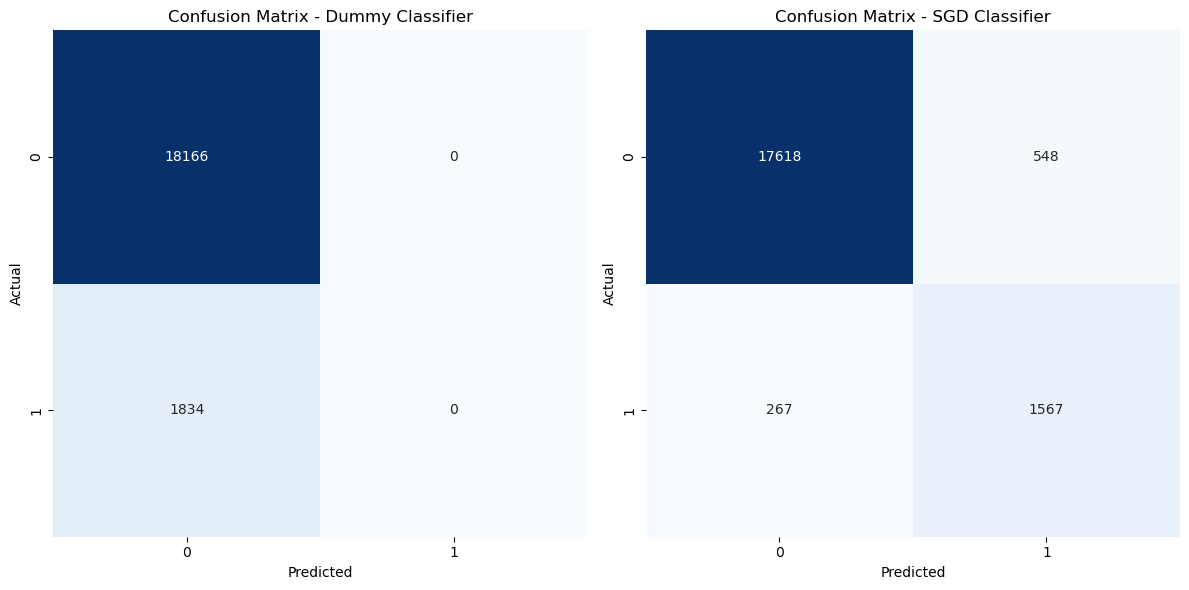

In [24]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Confusion matrix for the Dummy Classifier
M_dummy = np.array([[18166, 0],
                    [1834, 0]])

# Confusion matrix for the SGD Classifier
M_sgd = np.array([[17618, 548],
                  [267, 1567]])

# Create a figure with subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Create heatmaps for both confusion matrices
sns.heatmap(M_dummy, annot=True, fmt='d', cmap='Blues', cbar=False, ax=axes[0])
axes[0].set_title('Confusion Matrix - Dummy Classifier')
axes[0].set_xlabel('Predicted')
axes[0].set_ylabel('Actual')

sns.heatmap(M_sgd, annot=True, fmt='d', cmap='Blues', cbar=False, ax=axes[1])
axes[1].set_title('Confusion Matrix - SGD Classifier')
axes[1].set_xlabel('Predicted')
axes[1].set_ylabel('Actual')

plt.tight_layout()
plt.show()

# Two confusion matrices are defined using NumPy arrays. These matrices represent the results of two different classifiers:
# the Dummy Classifier and the SGD Classifier.
# Each confusion matrix is a 2x2 matrix with four values:
# The top-left value represents True Negatives (TN).
# The top-right value represents False Positives (FP).
# The bottom-left value represents False Negatives (FN).
# The bottom-right value represents True Positives (TP).

#solved by a robot (AI)

### Qe Conclusion

Now, conclude on all the exercise above. 

Write a short textual conclusion (max. 10- to 20-lines) that extract the _essence_ of the exercises: why did you think it was important to look at these particular ML concepts, and what was our overall learning outcome of the exercises (in broad terms).

In [ ]:
# We delved into metrics like accuracy, precision, recall, and F1-score to quantify model
# performance. Implemented custom precision, recall, and F1-score functions, deepening
# our understanding of their calculations. Using Scikit-Learn to apply standard evaluation
# metrics, enabling comparisons with our custom implementations. By assessing a Dummy 
# Classifier against an SGD Classifier, we grasped the significance of model selection.
# We learned the importance of splitting data into training and testing sets for realistic
# model assessment. We learn how imbalanced datasets became evident, emphasizing 
# the value of precision and recall. At the end we learned heatmaps to create clear 
# presentation and interpretation of evaluation results. Overall these exercises equipped
# us to rigorously evaluate and compare machine learning models. We understood metric
# trade-offs, honed data splitting skills, and recognized the challenges of imbalanced data. 

REVISIONS||
:- | :- |
2018-12-19| CEF, initial.
2018-02-07| CEF, updated.
2018-02-07| CEF, rewritten accuracy paradox section.
2018-03-05| CEF, updated with SHN comments.
2019-09-01| CEF, updated for ITMAL v2.
2019-09-04| CEF, updated for print-f and added conclusion Q.
2020-01-25| CEF, F20 ITMAL update.
2020-02-03| CEF, minor text fixes.
2020-02-04| CEF, updated page numbers to HOMLv2.
2020-02-17| CEF, added implementation note on denominator=0.
2020-09-03| CEF, E20 ITMAL update, udpated figs paths.
2020-09-06| CEF, added alt text.
2020-09-07| CEF, updated HOML page refs.
2020-09-21| CEF, fixed factor 2 error in beta-harmonic.
2021-01-12| CEF, F21 ITMAL update, moved revision tabel.
2021-08-02| CEF, update to E21 ITMAL.
2022-01-25| CEF, update to F22 STMAL.
2023-02-07| CEF, update HOML page numbers.
2023-02-09| CEF, chagned y_train to y_test in conf. matrix call.
2023-08-30| CEF, minor table change.